In [166]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Projet Easy Date

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Projet Easy Date


In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
data = pd.read_csv("train.csv", sep = ";", on_bad_lines='skip')

# Préparation des données

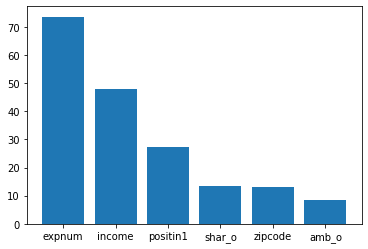

In [169]:
# Connaître le nombre de ligne pour faire le pourcentage
percent = len(data.axes[0])
# Stocker le nombre de valeur manquante en pourcentage
missing = (data.isnull().sum().sort_values(ascending = False) / percent)*100
# Garder les colonnes qui contiennent plus de 5% de valeurs manquantes
missing = missing[missing > 5]
# Stocker le nom des colonnes
index = missing.index
# Légende
y_pos = np.arange(len(missing))
# Barplot
plt.bar(y_pos, missing)
plt.xticks(y_pos, index)
plt.show()

In [170]:
data.drop(columns=missing.index, inplace=True)

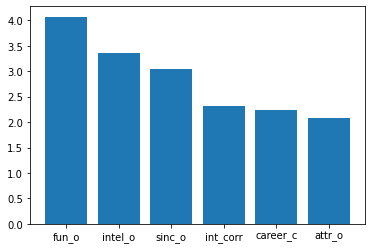

In [171]:
# Connaître le nombre de ligne pour faire le pourcentage
percent = len(data.axes[0])
# Stocker le nombre de valeur manquante en pourcentage
missing = (data.isnull().sum().sort_values(ascending = False) / percent)*100
# Garder les colonnes qui contiennent plus de 5% de valeurs manquantes
missing = missing[missing > 2]
# Stocker le nom des colonnes
index = missing.index
# Légende
y_pos = np.arange(len(missing))
# Barplot
plt.bar(y_pos, missing)
plt.xticks(y_pos, index)
plt.show()

In [172]:
col = ["fun_o", "intel_o", "sinc_o", "career_c", "attr_o"]
data.drop(columns= col, inplace=True)

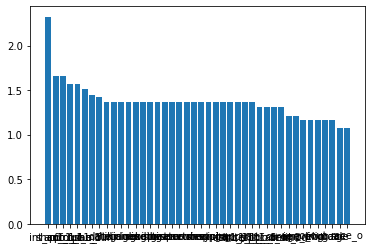

In [173]:
# Connaître le nombre de ligne pour faire le pourcentage
percent = len(data.axes[0])
# Stocker le nombre de valeur manquante en pourcentage
missing = (data.isnull().sum().sort_values(ascending = False) / percent)*100
# Garder les colonnes qui contiennent plus de 1% de valeurs manquantes
missing = missing[missing > 1]
# Stocker le nom des colonnes
index = missing.index
# Légende
y_pos = np.arange(len(missing))
# Barplot
plt.bar(y_pos, missing)
plt.xticks(y_pos, index)
plt.show()

In [174]:
data = data.replace(",", ".", regex= True)
data = data.apply(pd.to_numeric, downcast = "float", errors = "coerce")

data["diff_attr"]  = abs(data["attr1_1"] - data["pf_o_att"])
data["diff_sinc"] = abs(data["sinc1_1"] - data["pf_o_sin"])
data["diff_intel"] = abs(data["intel1_1"] - data["pf_o_int"])
data["diff_fun"] = abs(data["fun1_1"] - data["pf_o_fun"])
data["diff_amb"] = abs(data["amb1_1"] - data["pf_o_amb"])
data["diff_shar"] = abs(data["shar1_1"] - data["pf_o_sha"])
data["diff_age"] = abs(data["age"] - data["age_o"])
data["int_corr"] = abs(data["int_corr"])

In [175]:
from sklearn.model_selection import train_test_split

# On enlève les variables qualitatives du dataset
exclude = ["field", "from", "career"]
quali = data[exclude]
data = data.drop(columns=exclude)

# Variables pas présentes dans le fichier submission
useless = [ "position", "round", "dec_o", "order", "gender", "condtn"]
data = data.drop(columns = useless)

# On met la target dans la variable Y pour l'apprentissage
Y = data["match"]

# Toutes les variables d'informations qui ne sont pas explicatives
info = ["idg", "wave", "partner", "match"]
infos = data[info]
data = data.drop(columns=info)



X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, stratify = Y) # 70% training and 30% test
graph = pd.concat([X_train, y_train], axis=1, ignore_index=False)

In [176]:
outlier = ["goal", "date", "go_out", "sports", "tvsports", 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 
                            'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music','shopping', 'yoga', "exphappy"]

X_train.loc[X_train["gaming"] > 10] = X_train.loc[X_train["gaming"] ==10]
X_train.loc[X_train["reading"] > 10] = X_train.loc[X_train["reading"] ==10]

X_test.loc[X_test["gaming"] > 10] = X_test.loc[X_test["gaming"] ==10]
X_test.loc[X_test["reading"] > 10] = X_test.loc[X_test["reading"] ==10]

graph.loc[graph["gaming"] > 10] = graph.loc[graph["gaming"] ==10]
graph.loc[graph["reading"] > 10] = graph.loc[graph["reading"] ==10]

In [177]:
iid = X_train[['iid',"goal", "date", "go_out", "sports", "tvsports", 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music','shopping', 'yoga', "exphappy"]]

iid = X_test[['iid',"goal", "date", "go_out", "sports", "tvsports", 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music','shopping', 'yoga', "exphappy"]]

iid = iid.drop_duplicates("iid")
iid = iid.rename(columns={"iid": "pid"})


X_train = X_train.merge(iid, on = "pid", how = "left")
X_test = X_test.merge(iid, on = "pid", how = "left")
graph = graph.merge(iid, on = "pid", how = "left")

In [178]:
ID = ["iid_pid", "iid", "id", "pid"]
infos = X_train[ID]
X_train = X_train.drop(columns=ID)

infos = X_test[ID]
X_test = X_test.drop(columns=ID)

infos = graph[ID]
graph = graph.drop(columns=ID)

In [179]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
graph = graph.fillna(graph.mean())

In [180]:
X_train["diff_go_out"] = abs(X_train["go_out_x"] - X_train["go_out_y"])
X_train["diff_date"] = abs(X_train["date_x"] - X_train["date_y"])

# Supprimer les doublons des différences 
diff_doublons = ["age", "age_o", "go_out_x",  "go_out_y", "race", "race_o"]
X_train = X_train.drop(columns=diff_doublons)

X_test["diff_go_out"] = abs(X_test["go_out_x"] - X_test["go_out_y"])
X_test["diff_date"] = abs(X_test["date_x"] - X_test["date_y"])

# Supprimer les doublons des différences 
X_test = X_test.drop(columns=diff_doublons)


graph["diff_go_out"] = abs(graph["go_out_x"] - graph["go_out_y"])
graph["diff_date"] = abs(graph["date_x"] - graph["date_y"])

# Supprimer les doublons des différences 
graph = graph.drop(columns=diff_doublons)

**TESTER LES GRAPHS AVEC X_TRAIN / Y**

In [181]:
X_train["diff_go_out"] = [0 if el > 2 else 1 for el in X_train["diff_go_out"]]
X_test["diff_go_out"] = [0 if el > 2 else 1 for el in X_test["diff_go_out"]]
graph["diff_go_out"] = [0 if el > 2 else 1 for el in graph["diff_go_out"]]

Text(0.5, 1.0, "Taux de match par différence d'âge")

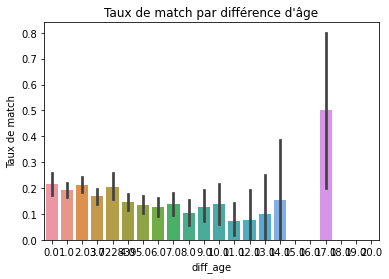

In [118]:
sns.barplot(x = "diff_age", y = "match", data = graph)
plt.ylabel("Taux de match")
plt.title("Taux de match par différence d'âge")

Text(0.5, 1.0, "Taux de match par différence d'âge")

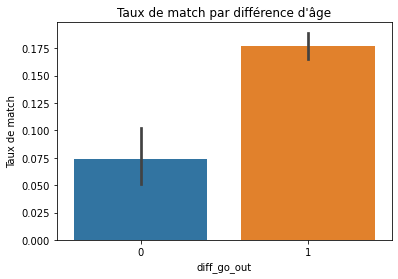

In [182]:
sns.barplot(x = "diff_go_out", y = "match", data = graph)
plt.ylabel("Taux de match")
plt.title("Taux de match par différence d'âge")

Text(0.5, 1.0, "Taux de match par différence d'âge")

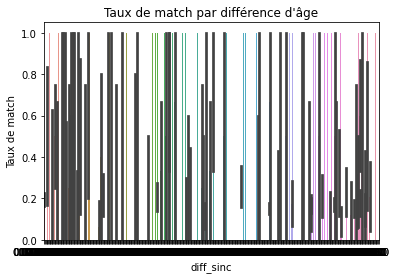

In [184]:
sns.barplot(x = "diff_sinc", y = "match", data = graph)
plt.ylabel("Taux de match")
plt.title("Taux de match par différence d'âge")

In [202]:
var_select = ["int_corr", "imprace", "diff_age", "diff_date", "diff_go_out", "diff_intel", "diff_sinc", "diff_shar", "diff_amb", "diff_attr", "diff_fun"]
X_train = X_train[var_select]
X_test = X_test[var_select]

column = list(test.columns)

In [196]:
test

,int_corr,imprace,diff_age,diff_date,diff_go_out,diff_intel,diff_sinc,diff_shar,diff_amb,diff_attr,diff_fun
0,0.15,8.0,6.0,2.0,1,14.790001,15.470000,2.91,4.02,0.510000,7.090000
1,0.41,1.0,6.0,2.0,1,2.000000,8.000000,1.00,6.00,2.000000,3.000000
2,0.35,1.0,2.0,3.0,1,5.000000,10.000000,5.00,10.00,30.000000,20.000000
3,0.39,1.0,0.0,4.0,1,25.000000,5.000000,5.00,0.00,55.000000,20.000000
4,0.09,6.0,6.0,2.0,1,5.000000,0.000000,10.00,5.00,5.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...,...
4757,0.63,1.0,5.0,1.0,1,10.000000,5.000000,20.00,5.00,10.000000,0.000000
4758,0.03,2.0,6.0,1.0,1,10.000000,0.000000,15.00,10.00,10.000000,15.000000
4759,0.11,4.0,3.0,1.0,0,7.000000,2.000000,10.00,5.00,5.000000,5.000000
4760,0.04,1.0,6.0,2.0,1,15.000000,25.000000,5.00,5.00,55.000000,15.000000


In [ ]:
#test = pd.DataFrame((test.values-np.mean(test.values, axis = 0))/np.std(test.values, axis = 0), columns = column)

# Modèle

## Random F

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set

In [186]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# generate dataset
# define model
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(data, X_train, y_train, scoring='f1-macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

TypeError: ignored

In [ ]:
modelfit = model.fit(X_train, y_train)
print(modelfit.score(X_train, y_train))

y_pred = modelfit.predict(X_test)

0.9696901153585161


## Regréssion logistique (nulle)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X = X_train, y = y_train)

LogisticRegression()

In [ ]:
temp = pd.DataFrame(lr.coef_[0], index = test.columns, columns = ["coef"])
print(temp.sort_values(by = "coef", ascending = False, key = lambda v:abs(v)))

                 coef
diff_age    -0.232678
diff_go_out -0.213646
imprace     -0.169847
diff_sinc   -0.111523
diff_attr    0.093655
diff_intel  -0.050202
int_corr     0.045768
diff_date    0.037569
diff_shar    0.034546
diff_fun     0.024921
diff_amb    -0.014107


In [ ]:
predBrut = lr.predict(X_test)
print(np.unique(predBrut, return_counts = True))

(array([0.]), array([1895]))


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predBrut))

[[1573    0]
 [ 322    0]]


In [ ]:
print(metrics.classification_report(y_test, predBrut))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1573
         1.0       0.00      0.00      0.00       322

    accuracy                           0.83      1895
   macro avg       0.42      0.50      0.45      1895
weighted avg       0.69      0.83      0.75      1895



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
sel = RFECV(estimator = lr, cv = 10, scoring = 'f1_macro')
sel.fit(X_train, y_train)

RFECV(cv=10, estimator=LogisticRegression(), scoring='f1_macro')

In [ ]:
sel.grid_scores_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.45364648, 0.45364648, 0.45364648,
        0.45364648, 0.45364648, 0.45364648, 0.45364648, 0.4529703 ],
       [0.45308642, 0.45364648, 0.4536464

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


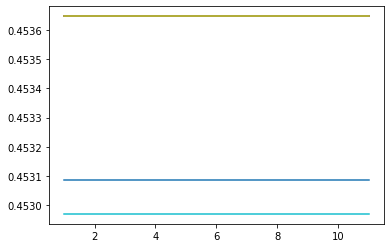

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,12,1), sel.grid_scores_)

In [ ]:
var = list(test.columns[sel.support_])

In [ ]:
variables = var
data = test[variables]

In [ ]:
predSel = sel.estimator_.predict(X_test[variables])
print(np.unique(predSel, return_counts = True))
print(metrics.confusion_matrix(y_test, predSel))

(array([0.]), array([1895]))
[[1573    0]
 [ 322    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix
mc = pd.DataFrame(confusion_matrix(y_test,y_pred), 
                  columns=['pred_0','pred_1'],
                  index=['obs_0','obs_1'])

mc

,pred_0,pred_1
obs_0,1584,114
obs_1,156,188


In [209]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test,y_pred))

0.8677766895200784


In [210]:
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

f1_score : 0.7517546561198191


In [191]:
from sklearn.model_selection import GridSearchCV
#cette fois-ci on utilise numpy pour générer des séquences à la place des listes
parameters = {'n_neighbors' : np.arange(start = 1, stop = 50, step = 1)}

In [ ]:
from sklearn.metrics import make_scorer, f1_score

knn = KNeighborsClassifier()
f1 = make_scorer(f1_score , average='macro')
knn = GridSearchCV(knn,
                                  parameters,
                                  scoring = f1,
                                  verbose = 2, 
                                  cv = 5)
knn.fit(X_train, y_train)

In [211]:
print("Voici les paramètres du meilleure modèle : " + 
      str(knn.best_estimator_))
print("Voici le "  + str(knn.scorer_) + 
      " du meilleure modèle : " + str(knn.best_score_))

AttributeError: ignored

In [212]:
y_pred = knn.predict(X_test)
print('f1_score : ' + 
      str(f1_score(y_test,y_pred, average='macro')))

f1_score : 0.7517546561198191


# Test sur submission

In [214]:
submission = pd.read_csv("submissions.csv", sep = ";", on_bad_lines='skip')

submission = submission.replace(",", ".", regex= True)
submission = submission.apply(pd.to_numeric, downcast = "float", errors = "coerce")

In [215]:
iid = submission[['iid',"goal", "date", "go_out", "sports", "tvsports", 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music','shopping', 'yoga', "exphappy"]]
iid = iid.drop_duplicates("iid")

iid = iid.rename(columns={"iid": "pid"})

submission = submission.merge(iid, on = "pid", how = "left")

In [216]:
submission["diff_attr"]  = abs(submission["attr1_1"] - submission["pf_o_att"])
submission["diff_sinc"] = abs(submission["sinc1_1"] - submission["pf_o_sin"])
submission["diff_intel"] = abs(submission["intel1_1"] - submission["pf_o_int"])
submission["diff_fun"] = abs(submission["fun1_1"] - submission["pf_o_fun"])
submission["diff_amb"] = abs(submission["amb1_1"] - submission["pf_o_amb"])
submission["diff_shar"] = abs(submission["shar1_1"] - submission["pf_o_sha"])
submission["diff_age"] = abs(submission["age"] - submission["age_o"])

submission["diff_go_out"] = abs(submission["go_out_x"] - submission["go_out_y"])
submission["diff_date"] = abs(submission["date_x"] - submission["date_y"])

submission["diff_go_out"] = [0 if el > 2 else 1 for el in submission["diff_go_out"]]

In [217]:
submission = submission.fillna(submission.mean())

In [218]:
submissions = submission[var_select]
columns_sub = list(submissions.columns)

In [223]:
pred = knn.predict(submissions)

In [224]:
dict = {"iid_pid" : submission.iid_pid, "target" : pred}
prediction = pd.DataFrame(dict)

prediction = prediction.astype(int)

In [225]:
prediction

,iid_pid,target
0,6805,0
1,6806,1
2,6807,0
3,6808,0
4,6809,0
...,...,...
1569,8374,0
1570,8375,0
1571,8376,1
1572,8377,0


In [226]:
prediction.target.value_counts()

0    1327
1     247
Name: target, dtype: int64

# Submit on Kaggle

In [227]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!pip install kaggle

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c easydate-ai-match

In [228]:
prediction.to_csv("my_submission.csv", index=False, header=True)

In [ ]:
# submit the file to kaggle
!kaggle competitions submit easydate-ai-match -f my_submission.csv -m "Yeah! I submit my file through the Google Colab!"